In [14]:
#Machine Learning HW 4 Q1 c (vi) Code
#By Udai Nagpal, ugn2000

#Standard Lloyds, for Q1 c(i)
import numpy as np
from numpy import linalg as LA

#Toy data for testing
#X = np.array([[1,2],[2,1],[3,2],[4,2]])
#Centers = np.array([[0,0],[1,1],[2,2]])
#clusters = np.array([2,4,2,1])

#This code assumes two-dimensional X with dimension n x d
def partition(X, centers):
  cluster_assignments = np.zeros(X.shape[0])
  for point_ind in range(X.shape[0]):
    center_distances = np.zeros(centers.shape[0])
    for center_ind in range(centers.shape[0]):
      center_distances[center_ind] = LA.norm(np.subtract(X[point_ind], centers[center_ind]))
    cluster_assignments[point_ind] = int(np.argmin(center_distances)+1.0)
  return cluster_assignments

def update_centers(X, k, cluster_assignments):
    updated_centers = np.zeros((k, X.shape[1]))
    for cluster in range(1,k+1):
        cluster_X = []
        for point_ind in range(cluster_assignments.shape[0]):
            if cluster_assignments[point_ind]==cluster:
                cluster_X.append(X[point_ind])
        cluster_X = np.array(cluster_X)
        updated_centers[cluster-1] = np.mean(cluster_X, axis=0)
    return updated_centers

#Initializes with uniform distribution from [0, max_component] for each dimension
def random_initialization(X,k):
    centers = np.zeros((k, X.shape[1]))
    for dim_ind in range(X.shape[1]):
        component_values = np.array(X[:,dim_ind])
        for center in range(k):
            centers[center, dim_ind] = np.random.uniform(low=np.amin(component_values),high=np.amax(component_values))
    return centers
            
#Lloyds with random initialization
def lloyds (X, k):
    centers = random_initialization(X,k)
    new_partition = np.zeros(X.shape[0])
    convergence = False
    while (convergence == False):
        last_partition = new_partition
        new_partition = partition(X, centers)
        if np.array_equal(last_partition,new_partition):
            convergence = True
            break
        centers = update_centers(X, k, new_partition)
    return [centers, new_partition]
#partition(X, Centers)
#update_centers(X, clusters)
#random_initialization(np.array([[1,1.5,4],[2,2.5,5]]), 3)
#print(lloyds(X, 2))

In [51]:
#Transformation of kmeans for part (vi)
import numpy as np
from numpy import linalg as LA
#Toy data
X = np.array([[2,4],[3,1],[4,2],[5,6]])

#Generating W from X and r
def generate_W (X, r):
    W = np.zeros((X.shape[0], X.shape[0]))
    for data_ind in range(X.shape[0]):
        X_current = X[data_ind]
        all_distances = np.zeros(X.shape[0])
        for possible_neighbor_ind in range(X.shape[0]):
            all_distances[possible_neighbor_ind] = LA.norm(X_current - X[possible_neighbor_ind])
        min_idx = np.argsort(all_distances)
        for nearest_neighbors_ind in range(r+1):
            if (min_idx[nearest_neighbors_ind] != data_ind):
                W[data_ind, min_idx[nearest_neighbors_ind]] = 1
                W[min_idx[nearest_neighbors_ind], data_ind] = 1
    return W

#Calculating D from W
def calculate_D (W):
    D = np.zeros((W.shape[0], W.shape[1]))
    for i in range(W.shape[0]):
        D[i,i] = np.sum(W[i,:])
    return D

#Running Lloyds on the transformed data V
def flexible_lloyds (X, r, k):
    V = np.zeros((X.shape[0], k))
    W = generate_W(X,r)
    D = calculate_D(W)
    L = D - W
    w,v = LA.eig(L)
    abs_w = np.abs(w)
    v_transpose = np.transpose(v)
    min_eig_ind = np.argsort(abs_w)
    #Setting datamatrix V as specified in problem statement
    for bottom_eig_ind in range(k):
        V[:, bottom_eig_ind] = v_transpose[min_eig_ind[bottom_eig_ind]]
    #For purposes of calling our existing Lloyds algorithm, we will transpose V
    lloyds_assignments = lloyds(V,k)[1]
    return [V, lloyds_assignments]
flexible_lloyds(X, 2, 2)

4


[array([[-5.00000000e-01,  1.06800332e-16],
        [-5.00000000e-01, -7.07106781e-01],
        [-5.00000000e-01,  7.48699631e-18],
        [-5.00000000e-01,  7.07106781e-01]]), array([2., 2., 2., 1.])]

/Users/udainagpal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


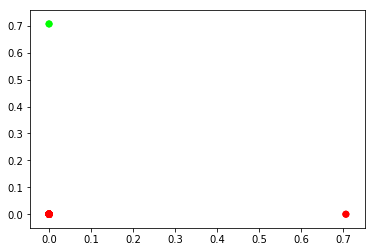

In [30]:
#Two Concentric Circles with r=1
#TA On Piazza said we are allowed to use sklearn dataset
from sklearn import datasets
import matplotlib.pyplot
%matplotlib inline  
dataset = datasets.make_circles()
X_concentric_circles = dataset[0]
lloyds_results = flexible_lloyds(X_concentric_circles, 1, 2)
transformed_data = lloyds_results[0]
lloyds_assignments = lloyds_results[1]
X_values = [point[0] for point in transformed_data]
Y_values = [point[1] for point in transformed_data]
#Mapping Lloyds Assignments to RGB Colors
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
#Plotting Results
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

/Users/udainagpal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


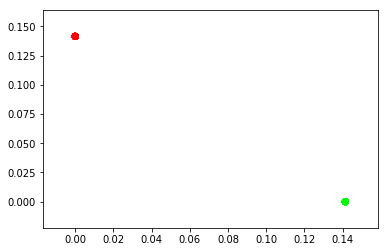

In [32]:
#Two Concentric Circles with r=2
#TA On Piazza said we are allowed to use sklearn dataset
from sklearn import datasets
import matplotlib.pyplot
%matplotlib inline  
dataset = datasets.make_circles()
X_concentric_circles = dataset[0]
lloyds_results = flexible_lloyds(X_concentric_circles, 2, 2)
transformed_data = lloyds_results[0]
lloyds_assignments = lloyds_results[1]
X_values = [point[0] for point in transformed_data]
Y_values = [point[1] for point in transformed_data]
#Mapping Lloyds Assignments to RGB Colors
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
#Plotting Results
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

/Users/udainagpal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


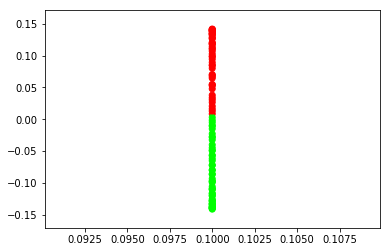

In [22]:
#Two Concentric Circles with r=20
#TA On Piazza said we are allowed to use sklearn dataset
from sklearn import datasets
import matplotlib.pyplot
%matplotlib inline  
dataset = datasets.make_circles()
X_concentric_circles = dataset[0]
lloyds_results = flexible_lloyds(X_concentric_circles, 20, 2)
transformed_data = lloyds_results[0]
lloyds_assignments = lloyds_results[1]
X_values = [point[0] for point in transformed_data]
Y_values = [point[1] for point in transformed_data]
#Mapping Lloyds Assignments to RGB Colors
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
#Plotting Results
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

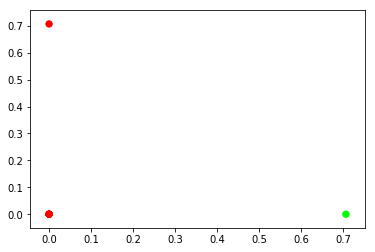

In [25]:
#Example Dataset #1 (nonlinear curves) with r=1
X_example_1 = np.array([[-4,2],[-4,5],[-3.25,2],[-2.75,5],[-1,0.4],[-2.75,5],[-1,4.75],[-0.5,4.5],[-1.5,1.75],
                        [0.25,3.5], [0.5,2.5],[0.5,1],[0.55,-0.5],[0.55,-1.5], [-1, -0.25],[-1,-1.5],[-1,-2.5],
                        [-1,-3.5],[-1,-4], [0.55,-2.5], [0.55,-3.5], [-2,5], [-2.5,2], [-3.5,5]])
lloyds_results = flexible_lloyds(X_example_1, 1, 2)
transformed_data = lloyds_results[0]
lloyds_assignments = lloyds_results[1]
X_values = [point[0] for point in transformed_data]
Y_values = [point[1] for point in transformed_data]
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

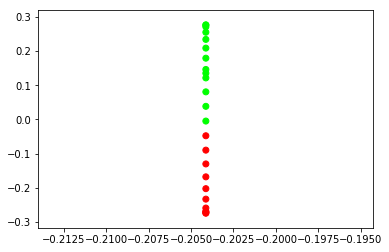

In [36]:
#Example Dataset #1 (nonlinear curves) with r=2
X_example_1 = np.array([[-4,2],[-4,5],[-3.25,2],[-2.75,5],[-1,0.4],[-2.75,5],[-1,4.75],[-0.5,4.5],[-1.5,1.75],
                        [0.25,3.5], [0.5,2.5],[0.5,1],[0.55,-0.5],[0.55,-1.5], [-1, -0.25],[-1,-1.5],[-1,-2.5],
                        [-1,-3.5],[-1,-4], [0.55,-2.5], [0.55,-3.5], [-2,5], [-2.5,2], [-3.5,5]])
lloyds_results = flexible_lloyds(X_example_1, 2, 2)
transformed_data = lloyds_results[0]
lloyds_assignments = lloyds_results[1]
X_values = [point[0] for point in transformed_data]
Y_values = [point[1] for point in transformed_data]
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

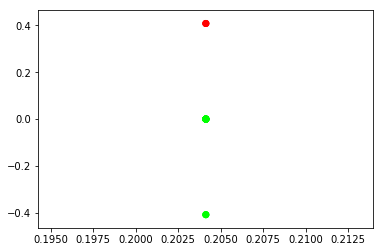

In [27]:
#Example Dataset #1 (nonlinear curves) with r=20
X_example_1 = np.array([[-4,2],[-4,5],[-3.25,2],[-2.75,5],[-1,0.4],[-2.75,5],[-1,4.75],[-0.5,4.5],[-1.5,1.75],
                        [0.25,3.5], [0.5,2.5],[0.5,1],[0.55,-0.5],[0.55,-1.5], [-1, -0.25],[-1,-1.5],[-1,-2.5],
                        [-1,-3.5],[-1,-4], [0.55,-2.5], [0.55,-3.5], [-2,5], [-2.5,2], [-3.5,5]])
lloyds_results = flexible_lloyds(X_example_1, 20, 2)
transformed_data = lloyds_results[0]
lloyds_assignments = lloyds_results[1]
X_values = [point[0] for point in transformed_data]
Y_values = [point[1] for point in transformed_data]
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

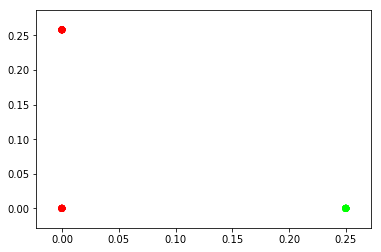

In [40]:
#Example Dataset #2 with r=2
X_example_2 = np.array([[1.56,0.46],[1.45,0.4],[2,0.6],[-4.7,0.5],[-6,1.25],[-4,0],[-4.5,0.1],
                        [-4,-0.5], [-4.5,-0.5], [-5,0.7], [-4.25,-2], [-2.75, -1.5], [-2,-2], [-1,-1.1], 
                        [-0.5, -0.5], [0.5,-0.25],[1.25,-0.9], [0.75,-2], [2.75,-2],[2.75,-1], [-3,-1],
                       [3.25,-0.3], [3.75, -0.7], [4.5, -1.05], [5,-0.9], [1.25,0.2],[-1.25,2.9],[-3,3],
                       [-2.75,2], [-2,2.1], [-1,1.75], [0, 2.5], [-1.57,1], [-2,1.5],
                       [-2.25, 1], [-1.9, 0.7], [-2, 3], [-0.5,2.5], [-3, 2.6], [-1.5, 2.3], [-2, -1.5],
                       [-2, -1], [2.6,1], [-1.5, 1.4], [-2.2, 2.5]])
lloyds_results = flexible_lloyds(X_example_2, 2, 2)
transformed_data = lloyds_results[0]
lloyds_assignments = lloyds_results[1]
X_values = [point[0] for point in transformed_data]
Y_values = [point[1] for point in transformed_data]
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

45


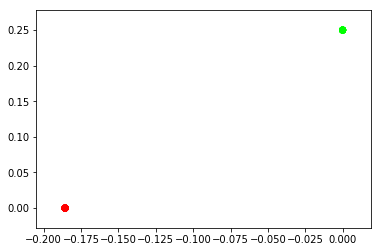

In [57]:
#Example Dataset #2 with r=3
X_example_2 = np.array([[1.56,0.46],[1.45,0.4],[2,0.6],[-4.7,0.5],[-6,1.25],[-4,0],[-4.5,0.1],
                        [-4,-0.5], [-4.5,-0.5], [-5,0.7], [-4.25,-2], [-2.75, -1.5], [-2,-2], [-1,-1.1], 
                        [-0.5, -0.5], [0.5,-0.25],[1.25,-0.9], [0.75,-2], [2.75,-2],[2.75,-1], [-3,-1],
                       [3.25,-0.3], [3.75, -0.7], [4.5, -1.05], [5,-0.9], [1.25,0.2],[-1.25,2.9],[-3,3],
                       [-2.75,2], [-2,2.1], [-1,1.75], [0, 2.5], [-1.57,1], [-2,1.5],
                       [-2.25, 1], [-1.9, 0.7], [-2, 3], [-0.5,2.5], [-3, 2.6], [-1.5, 2.3], [-2, -1.5],
                       [-2, -1], [2.6,1], [-1.5, 1.4], [-2.2, 2.5]])
lloyds_results = flexible_lloyds(X_example_2, 3, 2)
transformed_data = lloyds_results[0]
lloyds_assignments = lloyds_results[1]
X_values = [point[0] for point in transformed_data]
Y_values = [point[1] for point in transformed_data]
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)

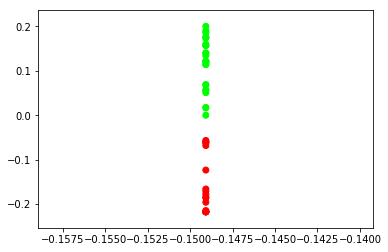

In [41]:
#Example Dataset #2 with r=20
X_example_2 = np.array([[1.56,0.46],[1.45,0.4],[2,0.6],[-4.7,0.5],[-6,1.25],[-4,0],[-4.5,0.1],
                        [-4,-0.5], [-4.5,-0.5], [-5,0.7], [-4.25,-2], [-2.75, -1.5], [-2,-2], [-1,-1.1], 
                        [-0.5, -0.5], [0.5,-0.25],[1.25,-0.9], [0.75,-2], [2.75,-2],[2.75,-1], [-3,-1],
                       [3.25,-0.3], [3.75, -0.7], [4.5, -1.05], [5,-0.9], [1.25,0.2],[-1.25,2.9],[-3,3],
                       [-2.75,2], [-2,2.1], [-1,1.75], [0, 2.5], [-1.57,1], [-2,1.5],
                       [-2.25, 1], [-1.9, 0.7], [-2, 3], [-0.5,2.5], [-3, 2.6], [-1.5, 2.3], [-2, -1.5],
                       [-2, -1], [2.6,1], [-1.5, 1.4], [-2.2, 2.5]])
lloyds_results = flexible_lloyds(X_example_2, 20, 2)
transformed_data = lloyds_results[0]
lloyds_assignments = lloyds_results[1]
X_values = [point[0] for point in transformed_data]
Y_values = [point[1] for point in transformed_data]
assignment_rgb_colors = []
for label in lloyds_assignments:
    if (label==1):
        assignment_rgb_colors.append([1,0,0])
    elif (label == 2):
        assignment_rgb_colors.append([0,1,0])
matplotlib.pyplot.scatter(X_values, Y_values, c=assignment_rgb_colors)